<a href="https://colab.research.google.com/github/Frankl1sales/cnc_d/blob/main/Relat%C3%B3rio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos

## Bibliotecas


In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Lagrange

In [174]:
# Algoritmo Polinômio de Lagrange
# Objetivo: Interpolar valor usando polinômio de Lagrange

# Função para calcular o polinômio de Lagrange
def lagrange_interpolation(x, y, z):
    m = len(x)  # número de pontos
    Pz = 0  # valor interpolado

    for i in range(m):
        c = 1
        d = 1
        for j in range(m):
            if i != j:
                c *= (z - x[j])
                d *= (x[i] - x[j])
        Pz += y[i] * (c / d)

    return Pz

In [175]:
# Exemplo de uso
x = [-1, 0, 2]  # vetor de abscissas
y = [4, 1, -1]  # vetor de ordenadas
z = 0.8  # valor a interpolar

# Calculando o valor interpolado
Pz = lagrange_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=0.8 é Pz=-0.43999999999999995


## Newton

In [176]:
def newton_interpolation(x, y, z):
    m = len(x)  # número de pontos
    Dely = y.copy()  # inicializa o vetor das diferenças divididas com os valores de y

    # Construção das diferenças divididas
    for i in range(1, m):
        for k in range(m - 1, i - 1, -1):
            Dely[k] = (Dely[k] - Dely[k - 1]) / (x[k] - x[k - i])

    # Avaliação do polinômio pelo método de Horner
    Pz = Dely[m - 1]
    for i in range(m - 2, -1, -1):
        Pz = Pz * (z - x[i]) + Dely[i]

    return Pz

In [177]:
 # Exemplo de uso
x = [1, 2, 3]  # vetor de abscissas
y = [2, 3, 5]  # vetor de ordenadas
z = 2.5  # valor a interpolar

# Calculando o valor interpolado
Pz = newton_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=2.5 é Pz=3.875


## Spline Cúbica Natural

In [178]:
def spline_cubica_natural(n, x, y):
    # Parâmetros de saída
    s2 = [0.0] * n
    info = 0

    # Verificações iniciais
    if n < 3:
        info = -1  # número de pontos n < 3
        return s2, info

    # Verifica se x está em ordem crescente
    ordenado = True
    for i in range(1, n):
        if x[i - 1] >= x[i]:
            ordenado = False
            break

    if not ordenado:
        info = -2  # abscissas não estão em ordem crescente
        return s2, info

    # Construção do sistema linear tridiagonal simétrico
    h = [0.0] * (n - 1)
    d = [0.0] * n
    b = [0.0] * (n - 1)

    for i in range(n - 1):
        h[i] = x[i + 1] - x[i]

    for i in range(1, n - 1):
        d[i] = 2 * (h[i - 1] + h[i])

    for i in range(1, n - 1):
        b[i] = (y[i + 1] - y[i]) / h[i]

    # Eliminação de Gauss
    for i in range(2, n - 1):
        ratio = h[i - 1] / d[i - 1]
        d[i] -= ratio * h[i - 1]
        b[i] -= ratio * b[i - 1]

    # Solução por substituições retroativas
    s2[n - 1] = 0.0
    for i in range(n - 2, 0, -1):
        s2[i] = (b[i] - h[i] * s2[i + 1]) / d[i]

    s2[0] = 0.0

    return s2, info


Derivadas Segundas:
s2[0] = 0.0
s2[1] = -0.17857142857142858
s2[2] = -0.2857142857142857
s2[3] = 0.3214285714285714
s2[4] = 0.0


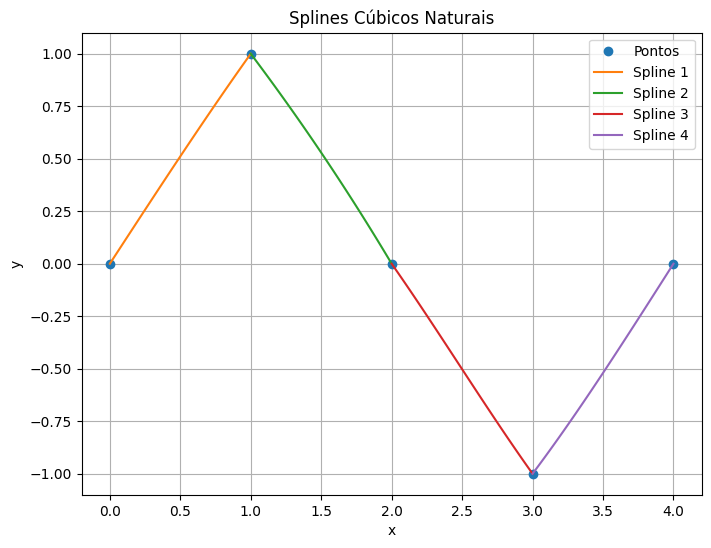

In [179]:
# Exemplo de pontos
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([0.0, 1.0, 0.0, -1.0, 0.0])
n = len(x)

# Calculando as derivadas segundas usando o algoritmo de splines cúbicos naturais
s2, info = spline_cubica_natural(n, x, y)

if info != 0:
    print(f"Erro: Info = {info}")
else:
    # Imprimindo as derivadas segundas calculadas
    print("Derivadas Segundas:")
    for i in range(n):
        print(f"s2[{i}] = {s2[i]}")

    # Plotando os pontos e a spline cúbica
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Pontos')

    # Interpolando com splines cúbicos usando as derivadas segundas
    for i in range(n - 1):
        t = np.linspace(x[i], x[i + 1], 100)
        a = y[i]
        b = (y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (2 * s2[i] + s2[i + 1]) * (x[i + 1] - x[i]) / 6
        c = s2[i] / 2
        d = (s2[i + 1] - s2[i]) / (6 * (x[i + 1] - x[i]))
        y_t = a + b * (t - x[i]) + c * (t - x[i])**2 + d * (t - x[i])**3
        plt.plot(t, y_t, label=f'Spline {i + 1}')

    plt.title('Splines Cúbicos Naturais')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


In [180]:
def evaluate_spline(x, y, s2, xi):
    n = len(x)
    for i in range(n - 1):
        if x[i] <= xi <= x[i + 1]:
            h = x[i + 1] - x[i]
            t = (xi - x[i]) / h
            y_interp = (1 - t) * y[i] + t * y[i + 1] + t * (1 - t) * ((1 - t) * s2[i] + t * s2[i + 1]) * h * h / 6
            return y_interp

## MMQ

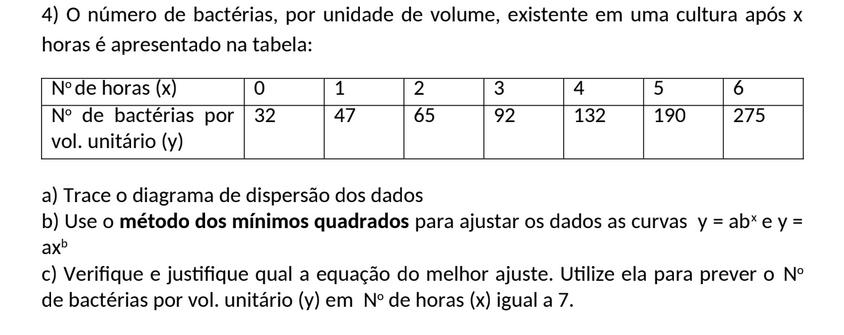

In [181]:
# Função modelo para o ajuste (não-linear)
model_func_exp = lambda x, a, b, c: a * b**x + c
model_func_pow = lambda x, a, b, c: a * x**b + c

In [182]:
# Plotando os dados originais
def pointsPlot(x_data, y_data):
  plt.scatter(x_data, y_data, label='Dados originais')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')

  plt.title('Ajuste não-linear usando o método dos mínimos quadrados')
  plt.show()

In [183]:
def linePlot(x_data, y_data, y_fit_exp, y_fit_pow, a_exp, b_exp, c_exp, a_pow, b_pow, c_pow):
    # Gerar pontos para a curva ajustada
    x_fit = np.linspace(min(x_data), max(x_data), 10)

    # Plotar os pontos originais e a curva ajustada
    plt.scatter(x_data, y_data, label='Pontos Originais', color='red')
    plt.plot(x_fit, y_fit_exp, color='green', label=f'Curva Ajustada (y = ab^x)\n$y = {a_exp:.2f} \cdot {b_exp:.2f}^x$')
    plt.plot(x_fit, y_fit_pow, color='brown', label=f'Curva Ajustada (y= ax^b)\n$y = {a_pow:.2f} \cdot x^{b_pow:.2f}$')
    plt.xlabel('Horas (x)')
    plt.ylabel('Número de Bactérias (y)')
    plt.ylim([0, 300])  # Ajustar o limite do eixo y
    plt.legend()
    plt.title('Ajuste Não-linear usando o Método dos Mínimos Quadrados')
    plt.show()

In [184]:
def dataFrame(x_data, y_data):
  # Criar um DataFrame com os dados
  df = pd.DataFrame({
      'x': x_data,
      'y': y_data,
      'xy': x_data * y_data,
      'x^2': x_data ** 2
  })

  # Calcular os somatórios
  sums = df.sum()
  sums.name = 'Soma'
  df = pd.concat([df, sums.to_frame().T], ignore_index=False)

  # Exibir a tabela
  print(df)

In [185]:
def mmq_fit(x_data, y_data):
    # Transformar y_data para ln(y_data)
    ln_y_data = [math.log(y) for y in y_data]

    # Calcular as somas necessárias
    n = len(x_data)
    sum_x = sum(x_data)
    sum_ln_y = sum(ln_y_data)
    sum_x2 = sum(x**2 for x in x_data)
    sum_x_ln_y = sum(x * ln_y for x, ln_y in zip(x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b = (n * sum_x_ln_y - sum_x * sum_ln_y) / (n * sum_x2 - sum_x**2)
    ln_a = (sum_ln_y - b * sum_x) / n
    a = math.exp(ln_a)

    return a, b

In [186]:
def mmq_fit_exponential(x_data, y_data):
    # Transformar y_data para ln(y_data)
    ln_y_data = [math.log(y) for y in y_data]

    # Calcular as somas necessárias
    n = len(x_data)
    sum_x = sum(x_data)
    sum_ln_y = sum(ln_y_data)
    sum_x2 = sum(x**2 for x in x_data)
    sum_x_ln_y = sum(x * ln_y for x, ln_y in zip(x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b_ln = (n * sum_x_ln_y - sum_x * sum_ln_y) / (n * sum_x2 - sum_x**2)
    ln_a = (sum_ln_y - b_ln * sum_x) / n
    a = math.exp(ln_a)
    b = math.exp(b_ln)

    return a, b

In [187]:
def mmq_fit_power(x_data, y_data):
    # Transformar y_data e x_data para ln(y_data) e ln(x_data)
    ln_y_data = [math.log(y) for y in y_data]
    ln_x_data = [math.log(x) for x in x_data if x != 0]  # Evitar log(0)

    # Filtrar y_data para corresponder a ln_x_data
    ln_y_data = [ln_y for x, ln_y in zip(x_data, ln_y_data) if x != 0]

    # Calcular as somas necessárias
    n = len(ln_x_data)
    sum_ln_x = sum(ln_x_data)
    sum_ln_y = sum(ln_y_data)
    sum_ln_x2 = sum(x**2 for x in ln_x_data)
    sum_ln_x_ln_y = sum(x * y for x, y in zip(ln_x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b = (n * sum_ln_x_ln_y - sum_ln_x * sum_ln_y) / (n * sum_ln_x2 - sum_ln_x**2)
    ln_a = (sum_ln_y - b * sum_ln_x) / n
    a = math.exp(ln_a)

    return a, b

In [188]:
# Calcular o EQM para cada modelo
def calculate_mse(model_func, x_data, y_data, a, b):
    predictions = model_func(x_data, a, b,0)
    mse = np.mean((y_data - predictions) ** 2)
    return mse

# Questões

## (1)

### (a) Qual foi aproximadamente a distância percorrida pelo automóvel no primeiros 45 minutos de viagem, considerando apenas os quatro primeiros pontos da tabela?

In [189]:
# lagrange
x = [0,10,30,60]  # vetor de abscissas
y = [0.0, 8.00, 27.00, 58.00]  # vetor de ordenadas
z = 45  # valor a interpolar

# Calculando o valor interpolado
Pz = lagrange_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=45 é Pz=42.5625


In [190]:
# newton
Pz = newton_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=45 é Pz=42.5625


### (b) Quantos minutos o automóvel gastou para chegar à metade do caminho?

In [191]:
# newton
z = 84.47953 # a metade do caminho é 80km
Pz = newton_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=84.47953 é Pz=79.99999311733313


portanto, para chegar na metade do percurso,decorreu-se 84.48 minutos

## (2)

### (a) e (b)

In [192]:
# Dados experimentais
x = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
y = np.array([2.74, 5.48, 7.90, 11.00, 13.93, 16.43, 20.24, 23.52])

# Estimando resistência para comprimentos de 1730 m e 3200 m usando polinômio de grau 2
comprimentos = [1730, 3200]

for comprimento in comprimentos:
    resistencia_estimada = lagrange_interpolation(x[3:6], y[3:6], comprimento)  # Usando os primeiros 3 pontos para um polinômio de grau 2
    print(f"Para comprimento {comprimento} m, resistência estimada (polinômio grau 2) = {resistencia_estimada:.2f} Ohms")

Para comprimento 1730 m, resistência estimada (polinômio grau 2) = 9.24 Ohms
Para comprimento 3200 m, resistência estimada (polinômio grau 2) = 17.31 Ohms


In [193]:
# Estimando resistência para comprimentos de 1730 m e 3200 m usando polinômio de grau 3
for comprimento in comprimentos:
    resistencia_estimada = lagrange_interpolation(x[:4], y[:4], comprimento)  # Usando os primeiros 4 pontos para um polinômio de grau 3
    print(f"Para comprimento {comprimento} m, resistência estimada (polinômio grau 3) = {resistencia_estimada:.2f} Ohms")

Para comprimento 1730 m, resistência estimada (polinômio grau 3) = 9.18 Ohms
Para comprimento 3200 m, resistência estimada (polinômio grau 3) = 27.20 Ohms


x[3:6] cria um slice de x que inclui os elementos nos índices 3, 4 e 5, isso valoreze a instimativa de 3200m pois o 5x é 3000m

## (3)

### (a)

In [194]:
# Dados de latitude e longitude
latitude = np.array([26 + 56/60 + 1/3600, 26 + 50/60 + 4/3600, 27 + 2/60 + 7/3600, 26 + 58/60 + 3/3600])
longitude = np.array([5 + 36/60, 5 + 56/60, 6 + 16/60, 6 + 36/60])

n = len(latitude)

# Calculando as derivadas segundas usando splines cúbicas naturais para latitude e longitude
s2_lat, info = spline_cubica_natural(n, longitude, latitude)

if info != 0:
    print(f"Erro ao calcular splines cúbicas naturais. Código de informação: {info}")
else:
    # Imprimindo as derivadas segundas calculadas
    print("Derivadas Segundas:")
    for i in range(n):
        print(f"s2[{i}] = {s2[i]}")

Derivadas Segundas:
s2[0] = 0.0
s2[1] = -0.17857142857142858
s2[2] = -0.2857142857142857
s2[3] = 0.3214285714285714


In [195]:
# Latitude correspondente à longitude λ = 6'
longitude_interp_a = 6.0
latitude_interp_a = evaluate_spline(longitude, latitude, s2_lat, longitude_interp_a)
print(f"a) Latitude da estrada quando longitude é λ = {longitude_interp_a}': {latitude_interp_a:.4f}'")


a) Latitude da estrada quando longitude é λ = 6.0': 26.8757'


Utiliza-se a função evaluate_spline, que interpola os valores de latitude usando os pontos calculados pela spline cúbica natural (s2_lat).

In [196]:
# Intervalo de longitude onde se espera que a estrada esteja mais próxima do equador
longitude_min_b = 6 + 16 / 60  # Converte 6'16'' de longitude para decimal
longitude_max_b = 6 + 36 / 60  # Converte 6'36'' de longitude para decimal

# Inicialização das variáveis para armazenar a latitude e longitude mais próximas do equador
closest_latitude = None
closest_longitude = None

# Inicializa a distância mínima ao equador com infinito positivo
min_distance_to_equator = float('inf')

# Iteração sobre os pontos de longitude e latitude para encontrar o ponto mais próximo do equador no intervalo especificado
for i in range(n - 1):
    # Verifica se a longitude atual está dentro do intervalo definido
    if longitude_min_b <= longitude[i] <= longitude_max_b:
        # Interpola a latitude correspondente à longitude atual usando splines cúbicas naturais
        latitude_interp = evaluate_spline(longitude, latitude, s2_lat, longitude[i])

        # Calcula a distância absoluta da latitude interpolada ao equador
        distance_to_equator = abs(latitude_interp)

        # Verifica se a distância calculada é menor que a mínima encontrada até agora
        if distance_to_equator < min_distance_to_equator:
            # Atualiza as coordenadas mais próximas do equador e a mínima distância encontrada
            closest_latitude = latitude_interp
            closest_longitude = longitude[i]
            min_distance_to_equator = distance_to_equator

# Imprime as coordenadas da estrada que estão mais próximas do equador
print(f"b) Coordenadas da estrada mais próxima do equador: Latitude {closest_latitude:.4f}', Longitude {closest_longitude:.4f}'")


b) Coordenadas da estrada mais próxima do equador: Latitude 27.0353', Longitude 6.2667'


## (4)

### (a)

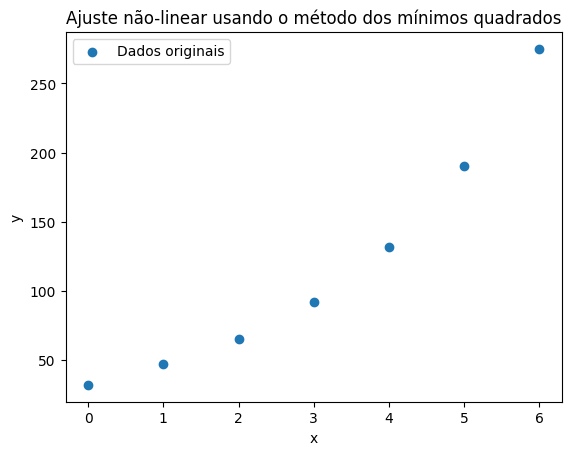

In [197]:
# Dados de exemplo
x_data = np.array([0, 1, 2, 3, 4, 5, 6])
y_data = np.array([32,47, 65, 92, 132, 190, 275])

pointsPlot(x_data, y_data)

### (b) Use o método dos mínimos quadrados para ajustar os dados as curvas y = ab^x e y =axb

In [198]:
# Ajustar o modelo exponencial aos dados
a_exp, b_exp = mmq_fit_exponential(x_data, y_data)
print(f"Coeficientes ajustados (y = ab^x): a = {a_exp}, b = {b_exp}")

# Ajustar o modelo de potência aos dados
a_pow, b_pow = mmq_fit_power(x_data, y_data)
print(f"Coeficientes ajustados (y =axb): a = {a_pow}, b = {b_pow}")

n = len(x_data)
x_fit = np.linspace(1, n, 10)
y_fit_exp = model_func_exp(x_fit, a_exp, b_exp, 0)  # c = 0
y_fit_pow = model_func_pow(x_fit, a_pow, b_pow, 0)  # c = 0

Coeficientes ajustados (y = ab^x): a = 32.1468513163175, b = 1.4269588061798035
Coeficientes ajustados (y =axb): a = 38.8387110601799, b = 0.9630907218717832


### (c) Verifique e justifique qual a equação do melhor ajuste. Utilize ela para prever o No de bactérias por vol. unitário (y) em No de horas (x) igual a 7.

EQM y = ab^x: 2.591728133053752
EQM y = ax^b: 732.6949329112447
Previsão y = ab^x para x = 7: 387.2741356647424
Previsão y = ax^b para x = 7: 253.02934423935858


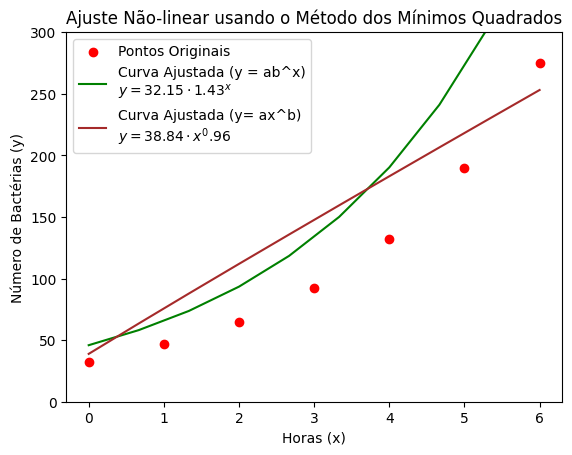

In [199]:
# Calcular o EQM para ambos os modelos
mse_exp = calculate_mse(model_func_exp, x_data, y_data, a_exp, b_exp)
mse_pow = calculate_mse(model_func_pow, x_data, y_data, a_pow, b_pow)

print(f"EQM y = ab^x: {mse_exp}")
print(f"EQM y = ax^b: {mse_pow}")

# Previsão para x = 7
x_new = 7
y_pred_exp = model_func_exp(x_new, a_exp, b_exp,0)
y_pred_pow = model_func_pow(x_new, a_pow, b_pow,0)

print(f"Previsão y = ab^x para x = 7: {y_pred_exp}")
print(f"Previsão y = ax^b para x = 7: {y_pred_pow}")

# Plotar as curvas ajustadas
linePlot(x_data, y_data, y_fit_exp, y_fit_pow, a_exp, b_exp, 0, a_pow, b_pow, 0)

a curva que apresenta o melhor ajuste é ay = ab^x, pois o seu EQM = 2.59172813, muito menor em comparação a outra.